# Line Chart Design Improvement

This notebook recreates the line chart design improvement from the [React Graph Gallery](https://www.react-graph-gallery.com/example/line-chart-design-improvement).

The chart visualizes 15 years of Reddit relationship advice, showing how advice patterns have changed over time.

## Design Improvements Implemented:

1. **Remove spine** - Remove the border/box around the chart
2. **Direct labeling** - Label lines directly at the end instead of using a legend
3. **Highlight** - Reduce opacity of less important lines to focus on key messages
4. **Author in caption** - Move author credit to bottom caption
5. **Remove X Grid** - Remove horizontal grid lines for cleaner look
6. **Better Y axis** - Add % to numbers, remove axis title
7. **Better X axis** - Show only main years (every 5 years), remove axis title


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import transforms
import numpy as np
import pandas as pd

# Set style
plt.rcParams['font.family'] = 'Arial'
#plt.rcParams['figure.dpi'] = 100

# Data from React Graph Gallery
data = {
    "End Relationship": {
        "2010": 31, "2011": 33, "2012": 34, "2013": 32, "2014": 35,
        "2015": 37, "2016": 39, "2017": 41, "2018": 40, "2019": 38,
        "2020": 39, "2021": 40, "2022": 42, "2023": 46, "2024": 49, "2025": 50
    },
    "Communicate": {
        "2010": 25, "2011": 24, "2012": 23, "2013": 22, "2014": 21,
        "2015": 21, "2016": 20, "2017": 19, "2018": 19, "2019": 18,
        "2020": 18, "2021": 17, "2022": 16, "2023": 15, "2024": 14, "2025": 13
    },
    "Give Space / Time": {
        "2010": 19, "2011": 18, "2012": 18, "2013": 17, "2014": 17,
        "2015": 17, "2016": 16, "2017": 16, "2018": 15, "2019": 15,
        "2020": 15, "2021": 15, "2022": 14, "2023": 13, "2024": 12, "2025": 11
    },
    "Set / Respect Boundar.": {
        "2010": 12, "2011": 12, "2012": 11, "2013": 11, "2014": 12,
        "2015": 12, "2016": 12, "2017": 12, "2018": 12, "2019": 13,
        "2020": 13, "2021": 13, "2022": 14, "2023": 14, "2024": 15, "2025": 15
    },
    "Seek Therapy": {
        "2010": 6, "2011": 6, "2012": 6, "2013": 7, "2014": 7,
        "2015": 7, "2016": 8, "2017": 8, "2018": 9, "2019": 9,
        "2020": 10, "2021": 10, "2022": 10, "2023": 11, "2024": 11, "2025": 11
    },
    "Compromise": {
        "2010": 7, "2011": 7, "2012": 7, "2013": 6, "2014": 6,
        "2015": 6, "2016": 6, "2017": 6, "2018": 6, "2019": 5,
        "2020": 5, "2021": 5, "2022": 4, "2023": 4, "2024": 4, "2025": 4
    },
    "Other": {
        "2010": 3, "2011": 2, "2012": 3.5, "2013": 2, "2014": 3,
        "2015": 3.5, "2016": 3, "2017": 4, "2018": 4, "2019": 3,
        "2020": 2, "2021": 2, "2022": 3, "2023": 3, "2024": 4, "2025": 5
    }
}

# Color palette matching React version
COLORS = {
    "End Relationship": '#c23b3b',
    "Communicate": '#1f77b4',
    "Give Space / Time": '#2ca02c',
    "Set / Respect Boundar.": '#ff7f0e',
    "Seek Therapy": '#9467bd',
    "Compromise": '#17becf',
    "Other": '#7f7f7f'
}

# Opacity for highlighting (1 = full opacity, 0.4 = reduced)
OPACITY = {
    "End Relationship": 1.0,
    "Communicate": 1.0,
    "Give Space / Time": 0.4,
    "Set / Respect Boundar.": 0.4,
    "Seek Therapy": 0.4,
    "Compromise": 0.4,
    "Other": 0.4
}

# Nudge values for label positioning (to avoid overlap)
NUDGE = {
    "End Relationship": 0,
    "Communicate": -2,
    "Give Space / Time": 8,
    "Set / Respect Boundar.": -3,
    "Seek Therapy": 4,
    "Compromise": 7,
    "Other": -3
}

print("Data and styling loaded successfully!")


Data and styling loaded successfully!


## Original Chart (Before Improvements)

Let's first create the original chart with all the common issues:
- Legend instead of direct labels
- Spine/border around chart
- Grid lines
- Axis titles
- Author label in top right
- All lines at full opacity


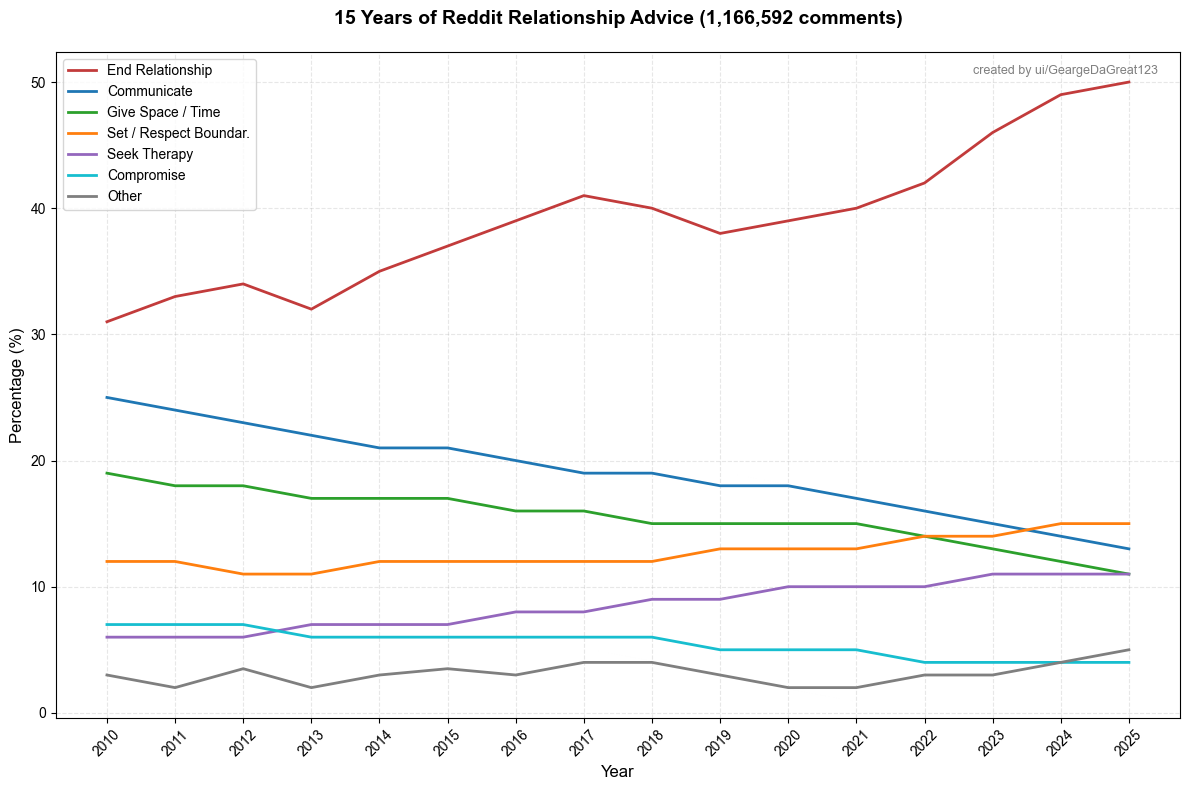

In [2]:
def create_original_chart():
    """Create the original chart with all common issues"""
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot each line
    for series_name, series_data in data.items():
        years = [int(year) for year in series_data.keys()]
        values = list(series_data.values())
        ax.plot(years, values, 
                color=COLORS[series_name], 
                linewidth=2, 
                label=series_name,
                alpha=1.0)
    
    # Add legend
    ax.legend(loc='upper left', fontsize=10)
    
    # Add grid
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Axis labels
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Percentage (%)', fontsize=12)
    
    # Title
    ax.set_title('15 Years of Reddit Relationship Advice (1,166,592 comments)', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Author label in top right
    ax.text(0.98, 0.98, 'created by ui/GeargeDaGreat123', 
            transform=ax.transAxes, 
            fontsize=9, 
            ha='right', 
            va='top',
            color='gray')
    
    # Set x-axis ticks
    ax.set_xticks(range(2010, 2026, 1))
    ax.set_xticklabels(range(2010, 2026, 1), rotation=45)
    
    plt.tight_layout()
    return fig, ax

fig_original, ax_original = create_original_chart()
plt.show()


## Improved Chart (After All Improvements)

Now let's create the improved version with all design enhancements applied.


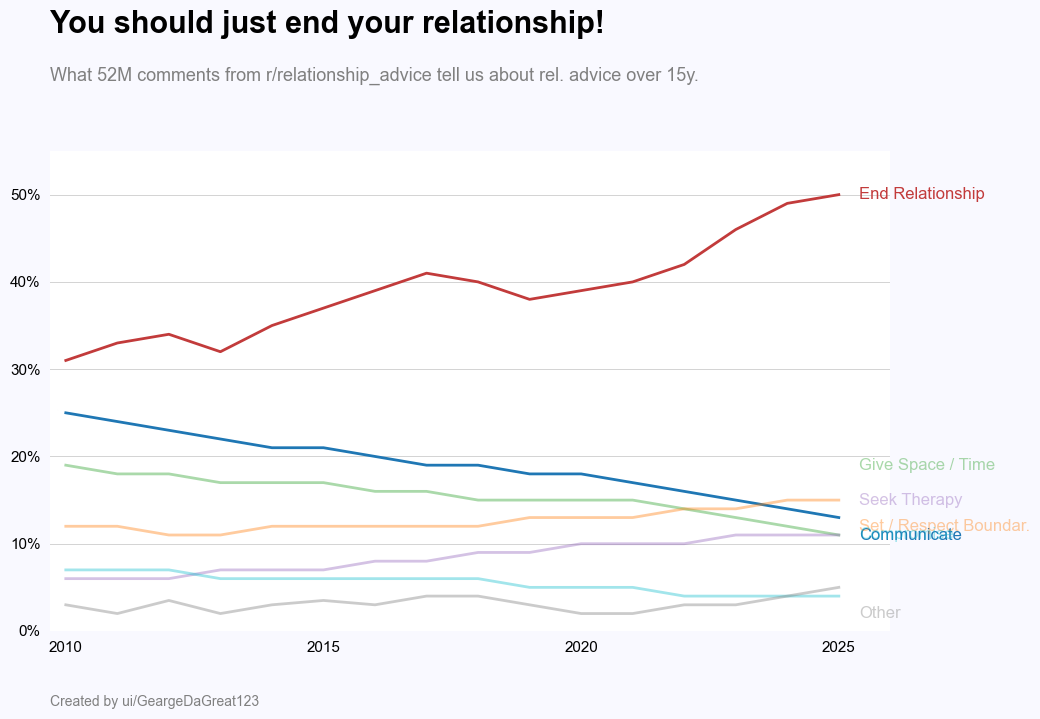

In [3]:
def create_improved_chart(highlight=True, fix_label_overlap=True):
    """
    Create the improved chart with all design enhancements.
    """
    # Set up figure and axis: NO "dpi hack" on margins, just tight and clear
    fig, ax = plt.subplots(figsize=(12, 8), facecolor='#f9f9ff')
    ax.set_facecolor('white')

    # Adjust subplot params to reduce unnecessary white space
    fig.subplots_adjust(left=0.14, right=0.84, top=0.78, bottom=0.18)

    # Plot each line
    for series_name, series_data in data.items():
        years = [int(year) for year in series_data.keys()]
        values = list(series_data.values())
        alpha = OPACITY[series_name] if highlight else 1.0
        ax.plot(
            years, values,
            color=COLORS[series_name],
            linewidth=2,
            alpha=alpha,
            zorder=2
        )

    # Remove all spines and ticks so only horizontal gridlines remain
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(left=False, bottom=False)

    # Direct labeling at the end of each line, optionally nudged
    for series_name, series_data in data.items():
        years = [int(year) for year in series_data.keys()]
        values = list(series_data.values())
        last_year = years[-1]
        last_value = values[-1]
        y_pos = last_value + NUDGE[series_name] if fix_label_overlap else last_value
        alpha = OPACITY[series_name] if highlight else 1.0
        ax.text(
            last_year + 0.4, y_pos, series_name,
            color=COLORS[series_name],
            fontsize=12,
            va='center',
            alpha=alpha,
            weight='normal',
            zorder=10,
            clip_on=False
        )

    # Remove vertical or all grid lines, just retain custom horizontal lines ("D3" style grid)
    ax.grid(False)
    y_max = max([max(v.values()) for v in data.values()])
    y_ticks = np.arange(0, y_max + 10, 10)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([f'{int(tick)}%' for tick in y_ticks], fontsize=11)
    for tick in y_ticks:
        ax.axhline(y=tick, color="#D3D3D3", linewidth=0.7, zorder=0)

    # Remove y-axis label/title
    ax.set_ylabel('')

    # "Main" years only for x-axis, larger tick labels, and remove label/title
    main_years = [year for year in range(2010, 2026) if year % 5 == 0]
    ax.set_xticks(main_years)
    ax.set_xticklabels(main_years, fontsize=11)
    ax.set_xlabel('')

    # Set axis limits with clean padding
    ax.set_xlim(2009.7, 2026)
    ax.set_ylim(0, y_max + 5)

    # Put author below plot, OUTSIDE axis (use transform=fig.transFigure)
    fig.text(
        0.14, 0.10,
        'Created by ui/GeargeDaGreat123',
        ha='left', va='top',
        fontsize=10, color='gray'
    )

    # Modern big chart title, left-aligned, and subtitle
    fig.text(
        0.14, 0.92,
        'You should just end your relationship!',
        fontsize=22, fontweight='bold', ha='left', va='bottom', color='black'
    )
    fig.text(
        0.14, 0.885,
        'What 52M comments from r/relationship_advice tell us about rel. advice over 15y.',
        fontsize=13, color='gray', ha='left', va='top'
    )

    return fig, ax

fig_improved, ax_improved = create_improved_chart(highlight=True, fix_label_overlap=True)
plt.show()
